0.4799911826848984
[3608.9756 3205.379 ]


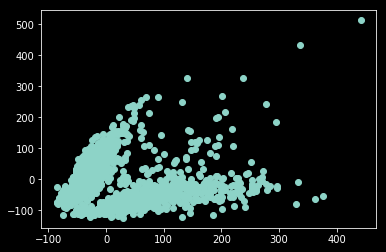

'Runtime: 0:00:04.864300'

In [6]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA

# Global Variables
t1 = 0
patients = 0
genes = 0
k = 5
centroids_array = 0
nearest_centroid = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids():
    global centroids_array, patients, genes, k
    # Create Centroid Array by randomly picking 5 patients from data  
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_numbers = np.random.randint(patients, size=k)
    centroids_array = np.empty([0, genes])
    i = 0
    # Pick random start sample 
    while i < k:
        random_patient = centroids_numbers[i]
        centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
        i += 1


def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 0
        while j < k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1


def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number, :]
    d = np.linalg.norm(a-b)
    return d


def kmeans():
    random_start_centroids()
    assign_centroids()


# General Code
# Import data
runtime_start()
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)

# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)


# Execute
kmeans()
pyplot.scatter(pca_data[:, 0], pca_data[:, 1])
pyplot.show()

runtime_end()
